In [64]:
import numpy as np
import librosa
import aubio
import matplotlib.pyplot as plt
import librosa.display
import pandas
import os
import glob

In [2]:
def firstOnsetDetect(path,dictionary):
    for subdir, dirs, files in os.walk(path):
        #print(1)
        for filename in files:
            #print(2)
            if filename.endswith(".wav"): 
               # print(3)
                filename = subdir + os.sep + filename
                sig , sr = librosa.load(filename,mono=True,sr=None)
                array = librosa.onset.onset_detect(sig,sr)
                value = array[0]
                dictionary[filename] = value

            if filename.endswith(".m4a"): 
               # print(4)
                filename = subdir + os.sep + filename
                sig , sr = librosa.load(filename,mono=True,sr=None)
                array = librosa.onset.onset_detect(sig,sr)
                value = array[0]
                dictionary[filename] = value

In [127]:
firstOnsets = {}
firstOnsetDetect('/Users/mattweisberg/GitHub/CompMusFall2018/Final_Project', firstOnsets)
#print(firstOnsets)

In [65]:
def extractAttr(filename):
    attr = pandas.read_csv(filename,header=None)
    x = attr.iloc[:,0]
    y = attr.iloc[:,1]  
    x = x[0:130]
    y = y[0:130]
    return y

In [4]:
def readall(attr, numpeople, numfiles):
    path = '/Users/mattweisberg/GitHub/CompMusFall2018/Final_Project/All/' + attr
    namearray = []
    valuesarray = [[]]
    maximum = 0
    minimum = 1000
    name = None
    x = 0 
    for subdir, dirs, files in os.walk(path):
        if dirs != []:
            namearray.append(dirs)
            for filename in files:
                if filename.endswith(".csv"):    
                    filepath = filepath = subdir + os.sep + filename
                    values = extractAttr(filepath)
                        for i in range(len(values)):
                            valuesarray[x].append(values[i])
                    mean = np.mean(values)
                    if mean > maximum:
                        maximum = mean
                        maxfile = filepath
                    if mean < minimum:
                        minimum = mean                            minfile = filepath
        x = x+1                 
        valuesarray.append([])
    
    namearray = namearray[0]
    plt.figure()
    plt.boxplot(valuesarray)
    plt.xticks([1,2,3,4,5],[namearray[0],namearray[1],namearray[2],namearray[3],namearray[4]])  
    plt.show()
    
    return valuesarray, namearray

IndentationError: unexpected indent (<ipython-input-4-77dcc22ec0c4>, line 16)

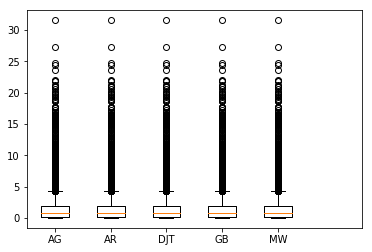

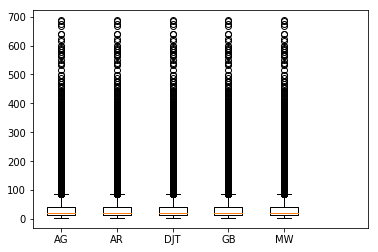

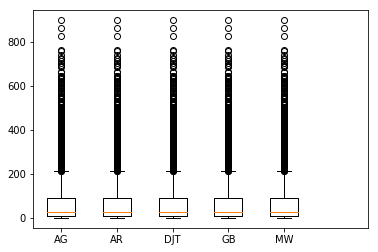

In [89]:
x, namesx = readall('OE',5)
y, namesy = readall('Inharm',5)
z, namesz = readall('SpecFlux',5)
#z = compress(y, 5 , 12)
#print(z)
#print(y) readall('Inharm')
#print(len(y[0]))




In [23]:
print(len(y[0]))
print(len(y[1]))
print(len(y[2]))
print(len(y[3]))
print(len(y[4]))

0
1482
1560
1479
1444


In [68]:
print(namesx)
# How to Trim to Just Name?

['AaronRourk', 'AlexGoldfarb', 'DJT', 'GrantBouvier', 'MW']


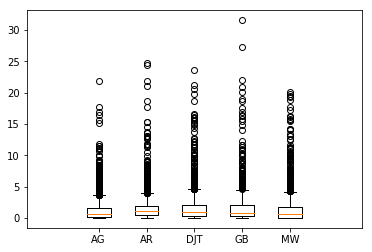

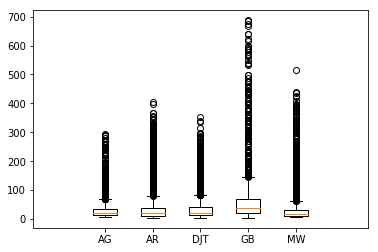

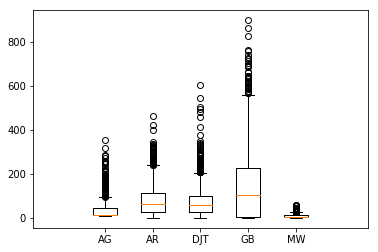

In [73]:
plt.figure()
plt.boxplot(x)
plt.xticks([2,3,4,5,6],[namesx[0],namesx[1],namesx[2],namesx[3],namesx[4]])  
#for i in range(len(namesx)):
 #   plt.xticks([i+2],[namesx[i]])  
plt.show()
 
plt.figure()
plt.boxplot(y)
plt.xticks([2,3,4,5,6],[namesy[0],namesy[1],namesy[2],namesy[3],namesy[4]]) 
plt.show()
plt.figure()
plt.boxplot(z)
plt.xticks([2,3,4,5,6],[namesz[0],namesz[1],namesz[2],namesz[3],namesz[4]]) 
plt.show()

In [26]:
def compress(array,numpeople,numfiles):
    newarray = [[]]*numpeople
    for x in range(numpeople):
        for i in range(numfiles):
            for j in range(int(len(array[i+(x*numfiles)]))):
                print(x)
                newarray[x].append(array[i+(x*numfiles)][j])
                
                
    return newarray
            

In [ ]:
extractAttr('/Users/mattweisberg/GitHub/CompMusFall2018/Final_Project/All/Inharm/GrantBouvier/Clip 1_vamp_vamp-libxtract_spectral_inharmonicity_spectral_inharmonicity.csv')

In [45]:
#plotMeans('Inharm')

In [46]:
#plotMeans('OE')

In [47]:
#plotMeans('SpecFlux')

In [ ]:
def compress(array):
    numsamples = 5 
    newarray = [[]]*numsamples
    print(len(newarray))
    
    for x in range(numsamples):
        print(x)
        len1 = 1
        for i in range(int(len(array)/numsamples)):
            len2 = 1
            for j in range(int(len(array[i])/numsamples)):
                newarray[x].append(array[x][j])
                #z = z+1 
                #print(z)
                #if z == 5:
                    #z = 0
           
    return newarray
            

In [ ]:
def plotMeans(name):
    path = '/Users/mattweisberg/GitHub/CompMusFall2018/Final_Project/All/' + name
    #path = os.getcwd()
    means, sds, namearray, maximum, maxfile, minimum, minfile,meanofmeans = readall(path)
    plt.figure()
    #plt.subplot(2,1,1)
    plt.plot(means[1], '*r', label=namearray[1])
    plt.plot(means[2], '*g',label=namearray[2])
    plt.plot(means[3], '*b',label=namearray[3])
    plt.plot(means[4], '*k',label=namearray[4])
    plt.plot(means[5], '*y',label=namearray[5])
    plt.title(name)
    plt.legend(loc="best")
    plt.legend("AADGM")
    
    plt.tight_layout()
    plt.savefig(name + '.png')
    #plt.subplot(2,1,2)
    plt.figure()
    plt.title("Mean of Means" +" " + name)
    plt.plot(meanofmeans[1], '*r', label=namearray[1])
    plt.plot(meanofmeans[2], '*g',label=namearray[2])
    plt.plot(meanofmeans[3], '*b',label=namearray[3])
    plt.plot(meanofmeans[4], '*k',label=namearray[4])
    plt.plot(meanofmeans[5], '*y',label=namearray[5])
    plt.legend(loc="best")
    plt.legend("AADGM")
    
    plt.savefig("Mean of Means" + name + '.png')
    plt.tight_layout()
    
    plotValues(maxfile)
    plotValues(minfile)
    
    
    print("/")
    print(maximum, maxfile)
    print("/")
    print(minimum, minfile)
    